In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# https://anaconda.org/anaconda/openjdk
# https://anaconda.org/conda-forge/padel

In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
target = new_client.target
target_query = target.search("acetylcholinesterase")
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,17.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
4,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
6,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
7,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
8,[],Anopheles gambiae,Acetylcholinesterase,15.0,False,CHEMBL2046266,"[{'accession': 'Q869C3', 'component_descriptio...",SINGLE PROTEIN,7165
9,[],Bemisia tabaci,AChE2,15.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038


In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,None,20703835,[],CHEMBL4627889,Inhibition of AChE (unknown origin) using acet...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.74
7545,None,20703856,[],CHEMBL4627888,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.51
7546,None,20708928,[],CHEMBL4628756,Inhibition of human AchE,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,125.0
7547,None,20708929,[],CHEMBL4628756,Inhibition of human AchE,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [8]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])

selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
7543,CHEMBL4645476,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,266000.0
7544,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,740.0
7545,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,510.0
7546,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,125000.0


In [9]:
bioactivity_threshold = []
for i in df2_nr.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [10]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4 = df4.dropna()
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
5098,CHEMBL3343926,CC(C)(C)OC(=O)N1Cc2[nH]c3ccccc3c2C[C@H]1C(=O)N...,187.0,inactive
5099,CHEMBL3343927,O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)[C@@H]1Cc2c...,63.2,active
5100,CHEMBL3343928,CC1c2[nH]c3ccccc3c2C[C@@H](C(=O)NCCCCCCNc2c3c(...,526.0,active
5101,CHEMBL3343929,CC1N[C@H](C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)...,203.0,inactive


In [11]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski

In [12]:
df_no_smiles = df4.drop(columns='canonical_smiles')

smiles = []
for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [13]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles = df_clean_smiles.dropna()
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
5098,CHEMBL3343926,187.0,inactive,CC(C)(C)OC(=O)N1Cc2[nH]c3ccccc3c2C[C@H]1C(=O)N...
5099,CHEMBL3343927,63.2,active,O=C(NCCCCCCNc1c2c(nc3ccccc13)CCCC2)[C@@H]1Cc2c...
5100,CHEMBL3343928,526.0,active,CC1c2[nH]c3ccccc3c2C[C@@H](C(=O)NCCCCCCNc2c3c(...
5101,CHEMBL3343929,203.0,inactive,CC1N[C@H](C(=O)NCCCCCCNc2c3c(nc4ccccc24)CCCC3)...


In [14]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [15]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)

In [16]:
df_combined = pd.concat([df4,df_lipinski], axis=1)
df_combined = df_combined.dropna()
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
3083,CHEMBL12089,COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2.[Cl-],774.0,active,313.445,3.5808,0.0,4.0
3093,CHEMBL31184,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,28000.0,active,408.590,4.2963,2.0,4.0
3129,CHEMBL990,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,6907.1,inactive,407.598,6.6439,0.0,3.0
3198,CHEMBL40583,Cc1ccc2cc3c(ccc4ccccc43)c3c2c1CC3,22683.0,active,519.693,7.1078,3.0,4.0


In [17]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    
        
    return x

In [18]:
df_combined['standard_value'] = df_combined['standard_value'].astype(float)
df_combined.standard_value.describe()

count    2.310000e+03
mean     6.526113e+12
std      1.695469e+14
min      8.000000e-03
25%      7.000000e+01
50%      1.000000e+03
75%      1.315000e+04
max      5.888437e+15
Name: standard_value, dtype: float64

In [19]:
-np.log10( (10**-9)* 100000000 )
-np.log10( (10**-9)* 10000000000 )

-1.0

In [20]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i >= 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [21]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
3083,CHEMBL12089,COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2.[Cl-],active,313.445,3.5808,0.0,4.0,774.0
3093,CHEMBL31184,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,active,408.590,4.2963,2.0,4.0,28000.0
3129,CHEMBL990,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,inactive,407.598,6.6439,0.0,3.0,6907.1
3198,CHEMBL40583,Cc1ccc2cc3c(ccc4ccccc43)c3c2c1CC3,active,519.693,7.1078,3.0,4.0,22683.0


In [22]:
df_norm.standard_value_norm.describe()

count    2.310000e+03
mean     5.604626e+05
std      6.697192e+06
min      8.000000e-03
25%      7.000000e+01
50%      1.000000e+03
75%      1.315000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [23]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
3083,CHEMBL12089,COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2.[Cl-],active,313.445,3.5808,0.0,4.0,6.111259
3093,CHEMBL31184,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,active,408.590,4.2963,2.0,4.0,4.552842
3129,CHEMBL990,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,inactive,407.598,6.6439,0.0,3.0,5.160704
3198,CHEMBL40583,Cc1ccc2cc3c(ccc4ccccc43)c3c2c1CC3,active,519.693,7.1078,3.0,4.0,4.644300


In [24]:
df_final.to_csv('acetylcholinesterase_data_3class_pIC50.csv')

In [25]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
3083,CHEMBL12089,COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2.[Cl-],active,313.445,3.5808,0.0,4.0,6.111259
3093,CHEMBL31184,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,active,408.590,4.2963,2.0,4.0,4.552842
3129,CHEMBL990,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,inactive,407.598,6.6439,0.0,3.0,5.160704
3198,CHEMBL40583,Cc1ccc2cc3c(ccc4ccccc43)c3c2c1CC3,active,519.693,7.1078,3.0,4.0,4.644300


In [26]:
df_2class.to_csv('acetylcholinesterase_data_2class_pIC50.csv')

In [27]:
import pandas as pd

In [28]:
selection = ['canonical_smiles','molecule_chembl_id']
df_final_selection = df_final[selection]
df_final_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [29]:
! cat padel.sh
! bash padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv
Processing CHEMBL133897 in molecule.smi (1/2310). 
Processing CHEMBL130098 in molecule.smi (7/2310). 
Processing CHEMBL130112 in molecule.smi (6/2310). 
Processing CHEMBL335033 in molecule.smi (12/2310). 
Processing CHEMBL337486 in molecule.smi (8/2310). 
Processing CHEMBL336538 in molecule.smi (9/2310). 
Processing CHEMBL341437 in molecule.smi (11/2310). 
Processing CHEMBL130628 in molecule.smi (4/2310). 
Processing CHEMBL336398 in molecule.smi (2/2310). 
Processing CHEMBL131588 in molecule.smi (3/2310). 
Processing CHEMBL130478 in molecule.smi (5/2310). 
Processing CHEMBL131051 in molecule.smi (10/2310). 
Processing CHEMBL122983 in molecule.smi (13/2310). 
Processing CHEMBL338720 in molecule.smi (14/2310). 
Processing CHEMBL339995 in molecule.smi (15/2310).

In [30]:
X = pd.read_csv('descriptors_output.csv')

In [31]:
X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336538,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL339995,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130098,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,CHEMBL1834808,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2306,CHEMBL990,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2307,CHEMBL1834809,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2308,CHEMBL31184,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import pandas as pd
Y = df_final['pIC50']
Y = pd.DataFrame(Y)
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
3083,6.111259
3093,4.552842
3129,5.160704
3198,4.644300


In [33]:
import pandas as pd
dataset3 = pd.concat([X,Y], axis=1)
dataset3 = dataset3.dropna()
dataset3

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,CHEMBL130478,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939
1,CHEMBL336538,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
2,CHEMBL339995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
3,CHEMBL130098,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
4,CHEMBL130628,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,CHEMBL1834808,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.207608
2306,CHEMBL990,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.295849
2307,CHEMBL1834809,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.419075
2308,CHEMBL31184,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.681937


In [34]:
dataset3.to_csv('acetylcholinesterase_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [36]:
X.shape

(2310, 882)

In [37]:
Y.shape

(2310, 1)

In [38]:
X = X.drop(columns=['Name'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2306,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2307,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2308,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [40]:
X.shape

(2310, 134)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.1863147818082096

In [43]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show>

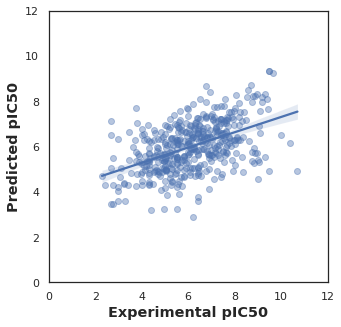

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show